In [47]:
#For testing, import the user name
from env import api_key
import requests
import pandas as pd
from bs4 import BeautifulSoup
from env import api_key
from time import sleep
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import os
from acquire import *
from prepare import *

pd.set_option("display.max_rows", None, "display.max_columns", None)

pd.reset_option("display.max_rows", "display.max_columns")

import re

In [48]:
df_10 = pd.read_csv('final_10.csv')

In [49]:
df_10.drop(columns = ['Unnamed: 0'],inplace = True)

In [50]:
df = df_10

In [51]:
train,test = prepare(df)

In [52]:
df = train

In [57]:
train.head()

,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,assistsplayer_8,assistsplayer_9,baron_team100,chemtechdragon_team100,currentGold_1,currentGold_10,currentGold_2,currentGold_3,currentGold_4,currentGold_5,currentGold_6,currentGold_7,currentGold_8,currentGold_9,deathsplayer_1,deathsplayer_10,deathsplayer_2,deathsplayer_3,deathsplayer_4,deathsplayer_5,deathsplayer_6,deathsplayer_7,deathsplayer_8,deathsplayer_9,dragon_team100,dragon_team200,earthdragon_team100,earthdragon_team200,firedragon_team100,firedragon_team200,gameDuration,gameEndTimestamp,gameId,gameMode,gameName,gameStartTimestamp,gameType,gameVersion,goldPerSecond_1,goldPerSecond_10,goldPerSecond_2,goldPerSecond_3,goldPerSecond_4,goldPerSecond_5,goldPerSecond_6,goldPerSecond_7,goldPerSecond_8,goldPerSecond_9,hextechdragon_team100,hextechdragon_team200,inhibs_lost_team200,jungleMinionsKilled_1,jungleMinionsKilled_10,jungleMinionsKilled_2,jungleMinionsKilled_3,jungleMinionsKilled_4,jungleMinionsKilled_5,jungleMinionsKilled_6,jungleMinionsKilled_7,jungleMinionsKilled_8,jungleMinionsKilled_9,killsplayer_1,killsplayer_10,killsplayer_2,killsplayer_3,killsplayer_4,killsplayer_5,killsplayer_6,killsplayer_7,killsplayer_8,killsplayer_9,level_1,level_10,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,magicDamageDoneToChampions_1,magicDamageDoneToChampions_10,magicDamageDoneToChampions_2,magicDamageDoneToChampions_3,magicDamageDoneToChampions_4,magicDamageDoneToChampions_5,magicDamageDoneToChampions_6,magicDamageDoneToChampions_7,magicDamageDoneToChampions_8,magicDamageDoneToChampions_9,matchId,minionsKilled_1,minionsKilled_10,minionsKilled_2,minionsKilled_3,minionsKilled_4,minionsKilled_5,minionsKilled_6,minionsKilled_7,minionsKilled_8,minionsKilled_9,physicalDamageDoneToChampions_1,physicalDamageDoneToChampions_10,physicalDamageDoneToChampions_2,physicalDamageDoneToChampions_3,physicalDamageDoneToChampions_4,physicalDamageDoneToChampions_5,physicalDamageDoneToChampions_6,physicalDamageDoneToChampions_7,physicalDamageDoneToChampions_8,physicalDamageDoneToChampions_9,queueId,riftherald_team100,riftherald_team300,timeEnemySpentControlled_1,timeEnemySpentControlled_10,timeEnemySpentControlled_2,timeEnemySpentControlled_3,timeEnemySpentControlled_4,timeEnemySpentControlled_5,timeEnemySpentControlled_6,timeEnemySpentControlled_7,timeEnemySpentControlled_8,timeEnemySpentControlled_9,time_cutoff,timestamp,totalDamageDoneToChampions_1,totalDamageDoneToChampions_10,totalDamageDoneToChampions_2,totalDamageDoneToChampions_3,totalDamageDoneToChampions_4,totalDamageDoneToChampions_5,totalDamageDoneToChampions_6,totalDamageDoneToChampions_7,totalDamageDoneToChampions_8,totalDamageDoneToChampions_9,totalGold_1,totalGold_10,totalGold_2,totalGold_3,totalGold_4,totalGold_5,totalGold_6,totalGold_7,totalGold_8,totalGold_9,towers_lost_team100,towers_lost_team200,trueDamageDoneToChampions_1,trueDamageDoneToChampions_10,trueDamageDoneToChampions_2,trueDamageDoneToChampions_3,trueDamageDoneToChampions_4,trueDamageDoneToChampions_5,trueDamageDoneToChampions_6,trueDamageDoneToChampions_7,trueDamageDoneToChampions_8,trueDamageDoneToChampions_9,ward_player_0,ward_player_1,ward_player_10,ward_player_2,ward_player_3,ward_player_4,ward_player_5,ward_player_6,ward_player_7,ward_player_8,ward_player_9,waterdragon_team100,winningTeam,xp_1,xp_10,xp_2,xp_3,xp_4,xp_5,xp_6,xp_7,xp_8,xp_9,chemtechdragon_team200,riftherald_team200,airdragon_team200,waterdragon_team200,BlueTeamDeaths,RedTeamDeaths,BlueTeamGoldPerSec,RedTeamGoldPerSec,BlueTeamJungleMinionsKilled,RedTeamJungleMinionsKilled,BlueTeamKills,RedTeamKills,BlueTeamLevel,RedTeamLevel,BlueTeamMagicDamageDoneToChampions,RedTeamMagicDamageDoneToChampions,BlueTeamMinionsKilled,RedTeamMinionsKilled,BlueTeamPhysicalDamageDoneToChampions,RedTeamPhysicalDamageDoneToChampions,BlueTeamTimeEnemySpentControlled,RedTeamTimeEnemySpentControlled,BlueTeamTotalDamageDon

In [53]:
def team_difference_stats(df):
    df['BlueTeamLevelDifference'] = df.BlueTeamLevel - df.RedTeamLevel
    df['BlueTeamXpDifference'] = df.BlueTeamXp - df.RedTeamXp
    df['BlueTeamWardDifference'] = df.BlueTeamWards - df.RedTeamWards
    df['blueteam_win'] = df['winningTeam'] == 100
    df['BlueTeamminionKillDifference'] = df.BlueTeamJungleMinionsKilled - df.RedTeamJungleMinionsKilled
    df['BlueTeamDeathsDifference'] = df.BlueTeamDeaths - df.RedTeamDeaths
    df['BlueTeamMagicDmgDifference'] = df.BlueTeamMagicDamageDoneToChampions - df.RedTeamMagicDamageDoneToChampions
    df['BlueTeamPhysicalDmgDifference'] = df.BlueTeamPhysicalDamageDoneToChampions - df.RedTeamPhysicalDamageDoneToChampions
    df['BlueTeamTrueDmgDifference'] = df.BlueTeamTrueDamageDoneToChampions - df.RedTeamTrueDamageDoneToChampions
    df['BlueTeamTotalDmgDifference'] = df.BlueTeamTotalDamageDoneToChampions - df.RedTeamTotalDamageDoneToChampions
    df['BlueTeamTotalMinionsMonstersDifference'] = ((df.BlueTeamMinionsKilled + df.BlueTeamJungleMinionsKilled) - 
                                    (df.RedTeamMinionsKilled + df.RedTeamJungleMinionsKilled))
    df['BlueTeamTimeCCingDifference'] = df.BlueTeamTimeEnemySpentControlled - df.RedTeamTimeEnemySpentControlled
    df['BlueteamWardDifference'] = df.BlueTeamWards - df.RedTeamWards
    df['BlueteamAssistDifference'] = df.BlueTeamAssists - df.RedTeamAssists
    df['BlueBotKillDifference'] = df.
    df['BlueJungTopkillDifference'] = df.
    return df

In [54]:
df = team_difference_stats(df)

In [55]:
df = df[['BlueTeamXpDifference','BlueTeamLevelDifference','BlueTeamWardDifference',
       'blueteam_win','BlueTeamminionKillDifference',
       'BlueTeamDeathsDifference','BlueTeamMagicDmgDifference','BlueTeamPhysicalDmgDifference',
       'BlueTeamTrueDmgDifference','BlueTeamTotalDmgDifference','BlueTeamTotalMinionsMonstersDifference',
       'BlueTeamTimeCCingDifference','BlueteamWardDifference','BlueteamAssistDifference']]

In [56]:
df.head(1)

,BlueTeamXpDifference,BlueTeamLevelDifference,BlueTeamWardDifference,blueteam_win,BlueTeamminionKillDifference,BlueTeamDeathsDifference,BlueTeamMagicDmgDifference,BlueTeamPhysicalDmgDifference,BlueTeamTrueDmgDifference,BlueTeamTotalDmgDifference,BlueTeamTotalMinionsMonstersDifference,BlueTeamTimeCCingDifference,BlueteamWardDifference,BlueteamAssistDifference
3513,2706,6,-173,False,10,-4,-774,1105,-418,-88,12,110674,-173,7


In [30]:
#btwin_df = df[df.blueteam_win == True]

1. Top
2. Jungle
3. Mid
4. Bot
5. Support
6. Top
7. Jungle
8. Mid
9. Bot
10. Support

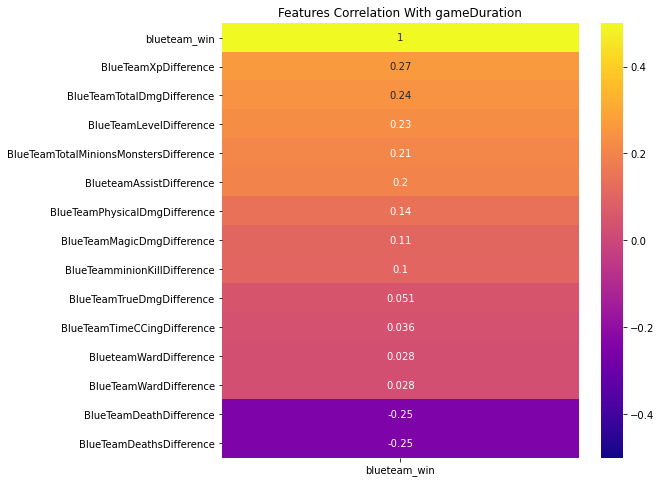

In [43]:
# redteamXP correlation when blue team wins
plt.figure(figsize = (8,8))
heatmap = sns.heatmap(df.corr()[['blueteam_win']].sort_values(by = 'blueteam_win',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')
plt.show()

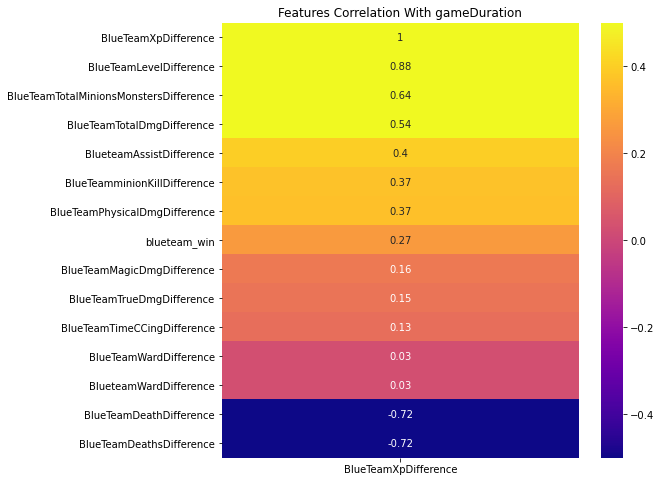

In [44]:
# blueteamXP correlation when blue team wins
plt.figure(figsize = (8,8))
heatmap = sns.heatmap(df.corr()[['BlueTeamXpDifference']].sort_values(by = 'BlueTeamXpDifference',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')
plt.show()

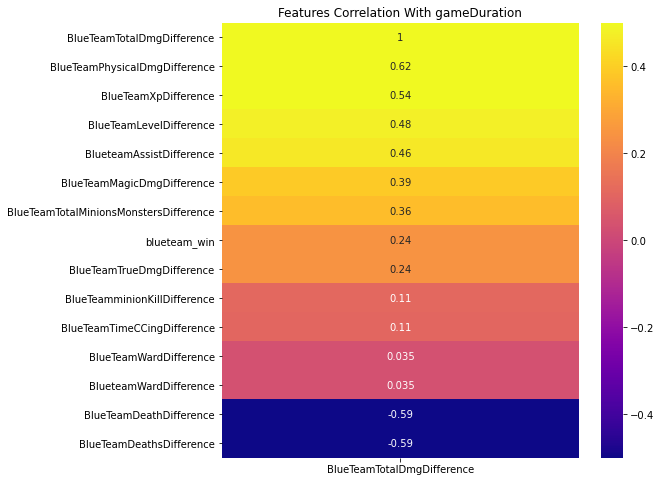

In [45]:
# blueteamXpDifference correlation when blue team wins
plt.figure(figsize = (8,8))
heatmap = sns.heatmap(df.corr()[['BlueTeamTotalDmgDifference']].sort_values(by = 'BlueTeamTotalDmgDifference',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')
plt.show()

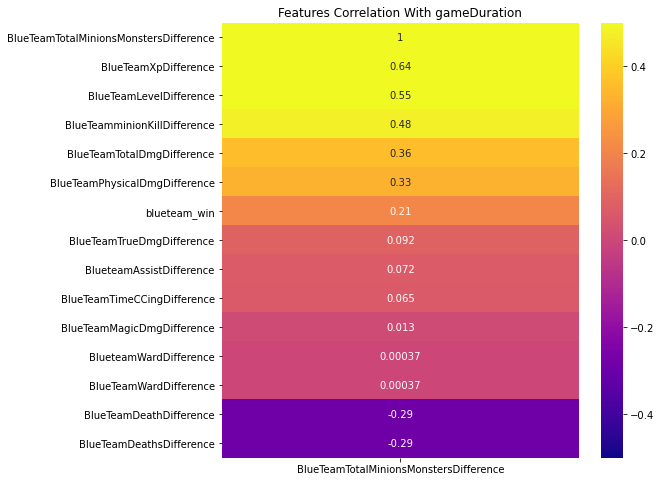

In [46]:
# blueteamXP correlation when blue team wins
plt.figure(figsize = (8,8))
heatmap = sns.heatmap(df.corr()[['BlueTeamTotalMinionsMonstersDifference']].sort_values(by = 'BlueTeamTotalMinionsMonstersDifference',ascending = False),vmin = -.5,vmax = .5,annot = True, cmap = 'plasma')
heatmap.set_title('Features Correlation With gameDuration')
plt.show()